In [1]:
%load_ext autoreload
%autoreload 2

## Prerequisties



following extensions should be enabled in your postgres database
- postgis
- postgis_raster


enable GDAL by executing these queries in your postgres database
```
SET postgis.gdal_enabled_drivers = 'ENABLE_ALL';
SELECT pg_reload_conf();
```


Now restart Postgresql

In [22]:
from postgis2raster import get_connection, analysis_circle, analysis_polygon

In [5]:
table_name = "gis_osm_roads_free_1"

## Single Band Circle Raster

In [126]:
out_image = 'test_circle_single_band.tiff'
analysis_circle(
    table=table_name,
    output_raster=out_image,
    query_x=16.55268272,
    query_y=40.82717010,
    radius=2500,
    cell_size=30,
    #classes = ['secondary'],
    class_column = 'fclass',
    geom_column = 'wkb_geometry',
    positive=1,
    negative=0,
    nodata=254,
    #classes_to_bands=True
)


True

Found 1 bands in raster test_circle_single_band.tiff


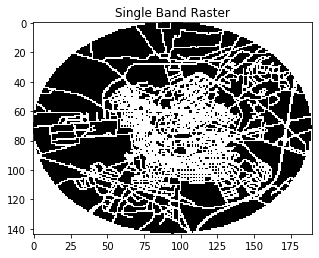

In [127]:
from postgis2raster.visualization import visualize_image
visualize_image(out_image)


## Multi Band Circle Raster

In [128]:
out_image = 'test_circle_multi_band.tiff'
analysis_circle(
    table=table_name,
    output_raster=out_image,
    query_x=16.55268272,
    query_y=40.82717010,
    radius=2500,
    cell_size=30,
    #classes = ['secondary'],
    class_column = 'fclass',
    geom_column = 'wkb_geometry',
    positive=1,
    negative=0,
    nodata=254,
    classes_to_bands=True
)


True

Found 15 bands in raster test_circle_multi_band.tiff


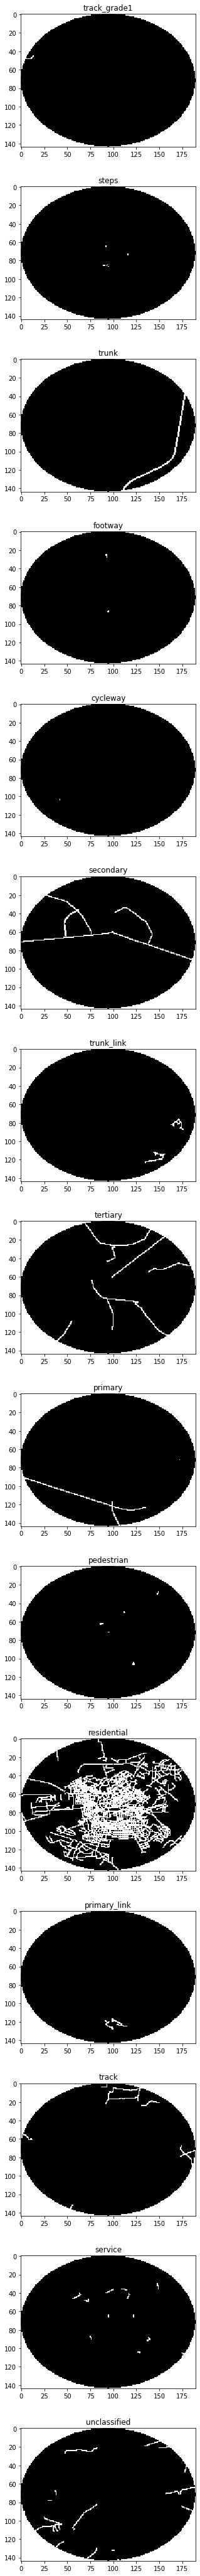

In [129]:
from postgis2raster.visualization import visualize_image
visualize_image(out_image)

## Single Band Polygon Raster

In [146]:
out_image = 'test_poly_single_band.tiff'
analysis_polygon(
    table=table_name,
    output_raster=out_image,
    query_x=16.55268272,
    query_y=40.82717010,
    height=5000,
    width=5000,
    cell_size=30,
    #classes = ['secondary'],
    class_column = 'fclass',
    geom_column = 'wkb_geometry',
    positive=1,
    negative=0,
    #classes_to_bands=True
)

True

Found 1 bands in raster test_poly_single_band.tiff


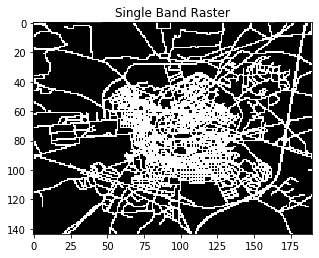

In [147]:
from postgis2raster.visualization import visualize_image
visualize_image(out_image)

## Multi Band Polygon Raster

In [130]:
out_image = 'test_poly_multi_band.tiff'
analysis_polygon(
    table=table_name,
    output_raster=out_image,
    query_x=16.55268272,
    query_y=40.82717010,
    height=5000,
    width=5000,
    cell_size=30,
    #classes = ['secondary'],
    class_column = 'fclass',
    geom_column = 'wkb_geometry',
    positive=1,
    negative=0,
    classes_to_bands=True
)

True

Found 16 bands in raster test_poly_multi_band.tiff


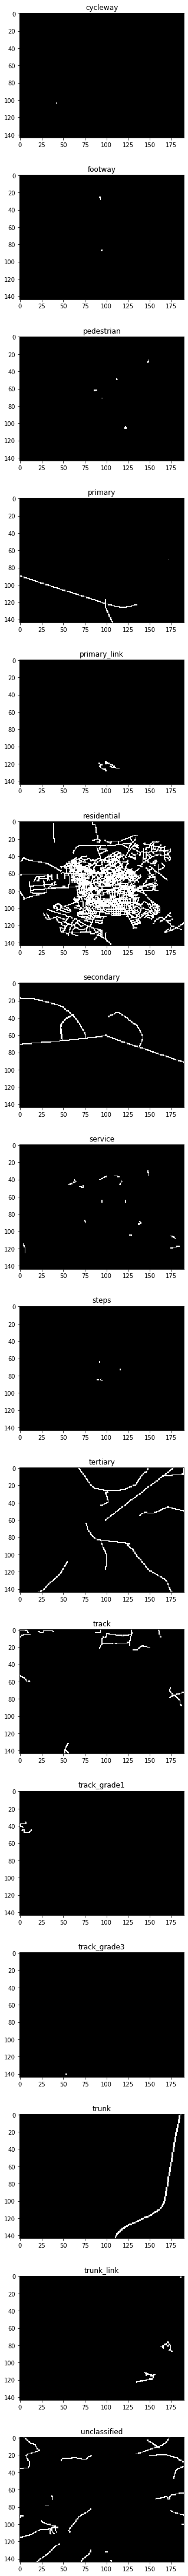

In [131]:
from postgis2raster.visualization import visualize_image
visualize_image(out_image)

## Custom Connection

In [144]:
host = 'localhost'
port = '5433'
database = 'mario_ricci'
username = 'postgres'
password = 'postgres'


In [145]:
connection = get_connection(username, password, host, port, database)

In [148]:
out_image = 'test_poly_single_band_cust_connetion.tiff'
analysis_polygon(
    table=table_name,
    output_raster=out_image,
    query_x=16.55268272,
    query_y=40.82717010,
    height=5000,
    width=5000,
    cell_size=30,
    #classes = ['secondary'],
    class_column = 'fclass',
    geom_column = 'wkb_geometry',
    positive=1,
    negative=0,
    #classes_to_bands=True
)

True

Found 1 bands in raster test_poly_single_band_cust_connetion.tiff


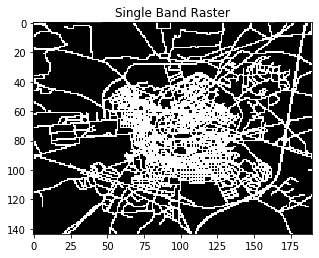

In [149]:
from postgis2raster.visualization import visualize_image
visualize_image(out_image)